# Model Context Protocol (MCP)

- MCP, is an open standard designed to enable seamless, secure, and structured **communication between AI-powered applications**—most notably large language models (LLMs)—and **external data sources or tools**.

- MCP works by defining a universal client-server architecture: AI applications (acting as **MCP clients**) interact with various external systems (**MCP servers**), which expose specific tools, data resources, or reusable prompts. [^1] [^3] [^5] [^6] [^7]

- The protocol, built on [JSON-RPC 2.0](https://www.jsonrpc.org/specification), acts as a common “language” allowing AI assistants to **call functions, fetch real-time data, or use predefined templates** from any connected service in a standardized way. This makes it far easier for LLM-based agents to access up-to-date information and capabilities without custom coding for each integration, similar to how USB provides a universal connector for computer peripherals. MCP has quickly gained traction in both open-source and commercial AI ecosystems and is a foundational technology for modern agentic AI systems and enhanced LLM deployments. [^4] [^5] [^6] [^7]

See also this [podcast](https://talkpython.fm/episodes/show/527/mcp-servers-for-python-devs).

[^1]: https://opencv.org/blog/model-context-protocol/

[^2]: https://modelcontextprotocol.io

[^3]: https://www.anthropic.com/news/model-context-protocol

[^4]: https://www.speakeasy.com/mcp/core-concepts

[^5]: https://www.descope.com/learn/post/mcp

[^6]: https://www.digitalocean.com/community/tutorials/model-context-protocol

[^7]: https://stytch.com/blog/model-context-protocol-introduction/

[^8]: https://www.reddit.com/r/ClaudeAI/comments/1ioxu5r/still_confused_about_how_mcp_works_heres_the/

[^9]: https://www.youtube.com/watch?v=CDjjaTALI68



In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Mounted at /content/drive


In [ ]:
%%capture
%pylab inline
import pandas as pd
import os
%load_ext rpy2.ipython
from IPython.display import Image

In [ ]:
import textwrap
def p80(text):
    print(textwrap.fill(text, 80))
    return None

Example MCP JSON-RPC messages for invoking a tool, following the MCP protocol’s structured request-response flow for tool calls.

**Tool Invocation Request (`tools/call`)**

```json
{
  "jsonrpc": "2.0",
  "id": 3,
  "method": "tools/call",
  "params": {
    "name": "echo",
    "arguments": {
      "message": "Testing 123"
    }
  }
}
```

This request asks the server to execute the tool named `echo` with the argument `message: "Testing 123"`.

**Successful Invocation Response**

```json
{
  "jsonrpc": "2.0",
  "id": 3,
  "result": {
    "content": [
      { "type": "text", "text": "Echo: Testing 123" }
    ]
  }
}
```

The server replies with the results of the tool execution. The output structure is determined by the tool’s API definition.

**Error Response Example**

```json
{
  "jsonrpc": "2.0",
  "id": 3,
  "error": {
    "code": 404,
    "message": "Tool not found"
  }
}
```



## MCP components

MCP (Model Context Protocol) has a modular architecture built around three main components: the Host, Client, and Server. Each has a distinct role for enabling secure and structured communication between AI applications and external resources or tools. [^1] [^2] [^3]

**Host**

The Host is the user-facing AI application or environment, such as Claude Desktop, an AI-powered IDE, or a custom agent application. Its responsibilities include managing user interactions, orchestrating the flow between LLM processing and tool calls, initiating client-server connections, and enforcing security boundaries. The Host coordinates the entire protocol lifecycle and ensures the user experience remains seamless. [^4] [^3] [^1]. See https://github.com/mcp/github/github-mcp-server for hosts such as VSCode.

**Client**

The Client resides within the Host application and is responsible for implementing the MCP protocol and handling one-to-one communication with a specific MCP Server. It manages session states, negotiates capabilities, handles secure data exchange, and routes requests or responses between the Host and Server. Each Client connects to a single Server, and Hosts can spawn multiple Clients to interface with multiple Servers. [^5] [^6] [^3]

**Server**

The Server is an independent process, service, or API that exposes functionality, data, or resources to AI models via the MCP protocol. Servers can provide tools (actions the AI can perform), resources (context or data), or prompts (reusable templates), and are responsible for processing incoming requests, executing external actions, and returning results to Clients. Servers work in isolation—focused on specific capabilities—and are designed to be simple, composable, and secure. [^7] [^3] [^4] [^1]

**Additional Layers: Data and Transport**

- **Data Layer**: Handles JSON-RPC-based protocol messaging, including tool/resource/prompt definitions, session management, and notifications. [^5]
- **Transport Layer**: Manages how data is exchanged (e.g., via stdio for local or HTTP+SSE for remote), including connection, framing, and authentication. [^4] [^5]

This clear separation of labor ensures that AI Hosts focus on reasoning, Clients manage secure and stateful interactions, and Servers provide modular, reusable extensions to the AI’s capabilities. [^3] [^7]

[^1]: https://modelcontextprotocol.io/specification/2025-03-26/architecture

[^2]: https://nebius.com/blog/posts/understanding-model-context-protocol-mcp-architecture

[^3]: https://huggingface.co/learn/mcp-course/en/unit1/architectural-components

[^4]: https://www.descope.com/learn/post/mcp

[^5]: https://modelcontextprotocol.io/docs/learn/architecture

[^6]: https://modelcontextprotocol.io/docs/learn/client-concepts

[^7]: https://workos.com/blog/how-mcp-servers-work

[^8]: https://www.anthropic.com/news/model-context-protocol

[^9]: https://www.ibm.com/think/topics/model-context-protocol

[^10]: https://code.visualstudio.com/docs/copilot/customization/mcp-servers



## A list of MCP servers

- A centralized, official source for discovering MCP servers is the MCP Registry, launched in 2025 as an open catalog and API dedicated to publicly available MCP servers. It acts like an app store for MCP servers, providing a single authoritative repository for server metadata, including endpoints, capabilities, and versions. [^1] [^2]

- The MCP Registry is hosted at `registry.modelcontextprotocol.io` and is community-owned with contributions from major organizations like Anthropic, GitHub, and Microsoft. It supports federated discovery through public and private sub-registries, allowing curated marketplaces and enterprise-specific registries to build on top of the shared core metadata. [^2] [^4]

- Anyone can browse the registry via its API to list MCP servers with pagination and search functionality, or developers can publish new servers following the registry’s open API specification. The registry emphasizes trust and moderation, featuring community mechanisms for flagging and removing malicious or spammy entries to maintain ecosystem integrity. [^4] [^1]

See: https://registry.modelcontextprotocol.io

A huge list of MCP servers is here: https://mcpmarket.com/server

From the GitHub page there is also a list of servers: https://github.com/modelcontextprotocol/servers

The GitHub MCP registry is at: https://github.com/mcp


[^1]: http://blog.modelcontextprotocol.io/posts/2025-09-08-mcp-registry-preview/

[^2]: https://modelcontextprotocol.info/tools/registry/

[^3]: https://www.infoq.com/news/2025/09/introducing-mcp-registry/

[^4]: https://workos.com/blog/mcp-registry-architecture-technical-overview

[^5]: https://github.com/modelcontextprotocol/registry

[^6]: https://registry.modelcontextprotocol.io/docs

[^7]: https://code.visualstudio.com/docs/copilot/customization/mcp-servers

[^8]: https://github.blog/ai-and-ml/generative-ai/how-to-find-install-and-manage-mcp-servers-with-the-github-mcp-registry/

[^9]: https://www.anthropic.com/news/model-context-protocol



## Example: YouTube

https://mcpmarket.com/server/youtube-transcript-6

In [ ]:
!pip install youtube_transcript_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.1/485.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi

ytt_api = YouTubeTranscriptApi()

# retrieve the available transcript
video_id = 'cn3tuy1GBpQ'
transcript_list = ytt_api.list(video_id)

In [ ]:
tscript = transcript_list.find_transcript(['en']).fetch()

In [ ]:
merged_text = ' '.join([snippet.text for snippet in tscript])
p80(merged_text)

Welcome to the late show. I'm your host, Stephen Colbear. Folks, it looked like
I don't know if you've seen I don't know if you see in the the newspapers today.
It looks like the government shutdown is coming to an end. Our long national
nightmare is different. At what how many days? 41 days so far. It is the longest
shutdown in US history. Democrats have been holding the line, demanding
Republicans compromise to keep Affordable Care Act subsidies available for
millions of Americans. Well, last night, eight Democratic senators voted with
Republicans to fund the government through January without any Affordable Care
Act guarantees. [Applause] So, yes. So, yes, yes, the shutdown may have been
long and painful for millions of Americans, but at least it achieved jack squat.
That is, and we know why Jack is squatting. But these Democratic defectors did
get one concession. Senate Majority Leader John Thun promised them a vote on the
ACA in December, cuz that's when people get down to serious

## Example: Calling a MCP Server to get YouTube Transcripts

In [ ]:
import requests
import json

def call_mcp_server_for_youtube_transcript(video_id, server_url="http://localhost:8080/mcp-youtube-transcript"):
    """Simulates calling an MCP server to get a YouTube transcript."""
    payload = {
        "jsonrpc": "2.0",
        "id": 1,
        "method": "tools/call",
        "params": {
            "name": "get_youtube_transcript",
            "arguments": {
                "video_id": video_id,
                "language": "en" # Assuming English transcript is requested
            }
        }
    }

    try:
        print(f"Attempting to call MCP server at {server_url} with video ID: {video_id}")
        # In a real scenario, you would send this to a live MCP server
        # response = requests.post(server_url, json=payload)
        # response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
        # result = response.json()

        # For this example, we'll simulate a successful response
        # using the data we already fetched with youtube_transcript_api
        global merged_text # Assuming merged_text is available from previous execution
        if 'merged_text' in globals():
            mock_result = {
                "jsonrpc": "2.0",
                "id": 1,
                "result": {
                    "content": [
                        {"type": "text", "text": merged_text}
                    ]
                }
            }
            print("Simulated MCP server response:")
            p80(json.dumps(mock_result, indent=2))
            return mock_result
        else:
            print("Error: 'merged_text' not found. Please run previous cells to fetch a transcript first.")
            return {
                "jsonrpc": "2.0",
                "id": 1,
                "error": {
                    "code": -32000,
                    "message": "No transcript data available for simulation."
                }
            }

    except requests.exceptions.RequestException as e:
        print(f"MCP Server call failed: {e}")
        return {
            "jsonrpc": "2.0",
            "id": 1,
            "error": {
                "code": -32000,
                "message": f"Failed to connect to MCP server: {e}"
            }
        }

# Example usage with the video_id we used before:
# Note: This is a simulated call as the MCP server URL is hypothetical.
mcp_response = call_mcp_server_for_youtube_transcript(video_id)

# You would then process mcp_response['result']['content'][0]['text']
# if the call was successful and contained text.

Attempting to call MCP server at http://localhost:8080/mcp-youtube-transcript with video ID: cn3tuy1GBpQ
Simulated MCP server response:
{   "jsonrpc": "2.0",   "id": 1,   "result": {     "content": [       {
"type": "text",         "text": "Welcome to the late show. I'm your host,
Stephen Colbear. Folks, it looked like I don't know if you've seen I don't know
if you see in the the newspapers today. It looks like the government shutdown is
coming to an end. Our long national nightmare is different. At what how many
days? 41 days so far. It is the longest shutdown in US history. Democrats have
been holding the line, demanding Republicans compromise to keep Affordable Care
Act subsidies available for millions of Americans. Well, last night, eight
Democratic senators voted with Republicans to fund the government through
January without any Affordable Care Act guarantees. [Applause] So, yes. So, yes,
yes, the shutdown may have been long and painful for millions of Americans, but
at least it

## Setting up a local MCP Server

- Python SDK with examples: https://github.com/modelcontextprotocol/python-sdk

- To try this out follow the instructions at https://pypi.org/project/mcp


Let's use Claude Code to call a MCP server that we run on our local machine. The detailed steps you can use on your laptop are as follows:

Set up the env from the CLI:

```
conda create -n mcp python=3.13
conda activate mcp
pip install uv
pip install "mcp[cli]"
```









Now, create an initial project by using the following instantiation:

```
uv init demo
cd demo
```

Copy the code from here into a file called `basic_tools.py` in the `demo` folder: https://github.com/modelcontextprotocol/python-sdk/blob/main/examples/snippets/servers/basic_tool.py

The file looks like this:

```python
from mcp.server.fastmcp import FastMCP

mcp = FastMCP(name="Tool Example")

@mcp.tool()
def sum(a: int, b: int) -> int:
    """Add two numbers together."""
    return a + b

@mcp.tool()
def get_weather(city: str, unit: str = "celsius") -> str:
    """Get weather for a city."""
    # This would normally call a weather API
    return f"Weather in {city}: 22degrees{unit[0].upper()}"
```

The `mcp.tool` decorator in Python is all you need to specify a function as a tool.

Now run the MCP server:

```
uv run mcp install basic_tools.py
```

Now, everything is ready for use by Claude Desktop.

## Use Claude Desktop as MCP Host & Client

Install Claude Desktop by downloading it from here: https://www.claude.com/download

Then run it!

First, go to `User` -> `Settings`

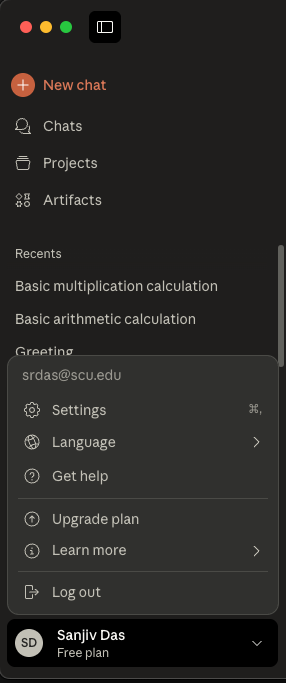

In [ ]:
Image('NLP_images/claude_chat.png', height=600)

Then choose `Developer` to see the running MCP servers.

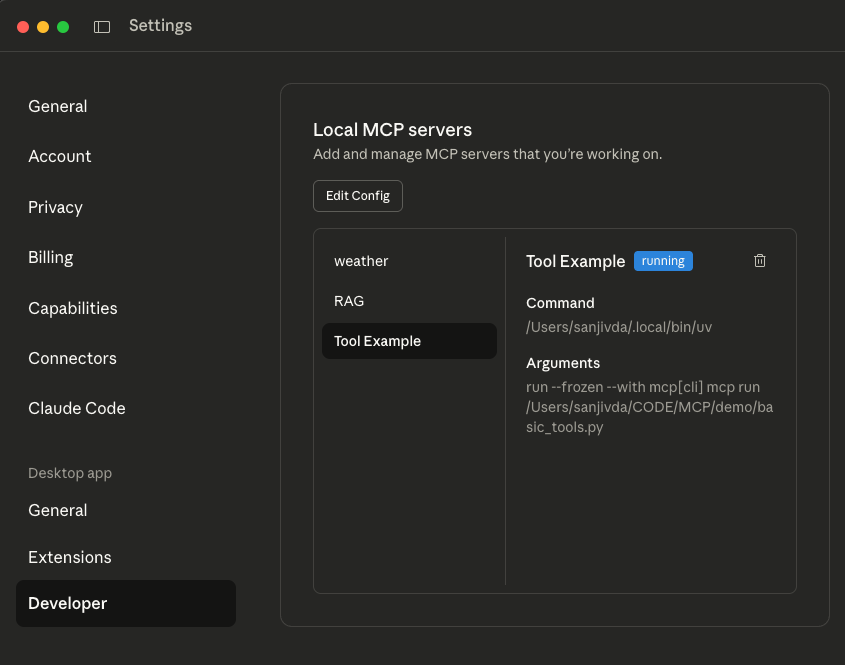

In [ ]:
Image('NLP_images/claude_dev_settings.png', width=600)

Then open `New Chat` to get the following:

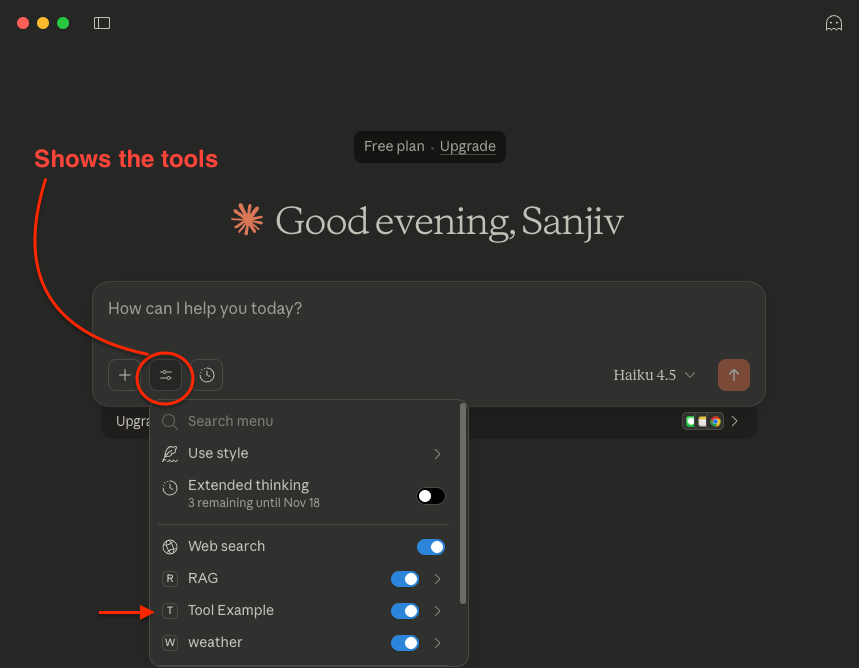

In [ ]:
Image('NLP_images/claude_chat_interface.png', width=600)

See that the tool `T` is used when apt:

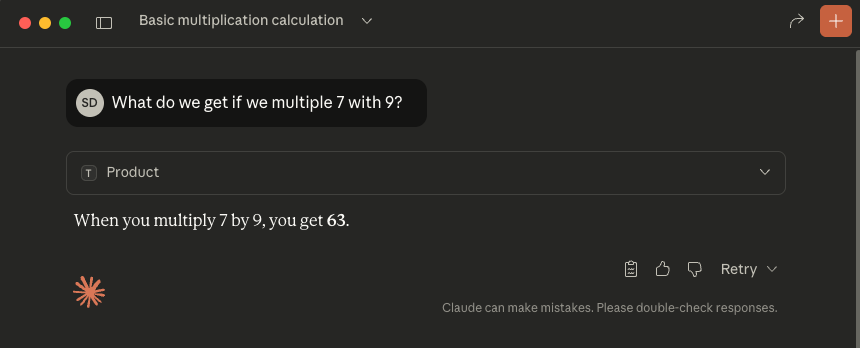

In [ ]:
Image('NLP_images/claude_tool_use.png', width=600)

Take a look at the other servers that may show you other usage patterns: https://github.com/modelcontextprotocol/python-sdk/tree/main/examples/snippets/servers

## Installing the MCP Server for using the File System

The approach to doing this is to use the `filesystem` MCP server from here: https://github.com/modelcontextprotocol/servers/tree/main/src/filesystem

Copy the NPX config into the  `claude_desktop_config.json` file. This file (on a Mac) is in this folder: `/Users/sanjivda/Library/Application Support/Claude`

```json
{
  "mcpServers": {
    "filesystem": {
      "command": "npx",
      "args": [
        "-y",
        "@modelcontextprotocol/server-filesystem",
        "/Users/username/Desktop",
        "/path/to/other/allowed/dir"
      ]
    }
  }
}
```

Update the paths to the folder above to the actual local folders you want to give access to.

Then restart Claude Desktop and you can issue commands to add files, delete files, etc.

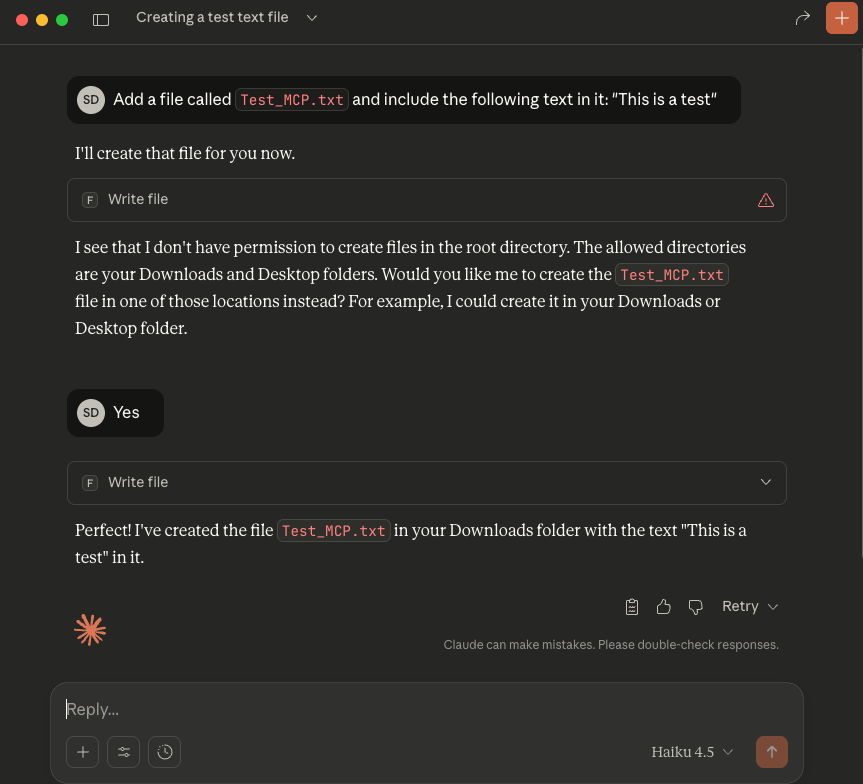

In [ ]:
Image('NLP_images/claude_fileserver.png', width=600)

## Using MCP Servers without Claude Desktop